# 1. Import All Required Packages

In [1]:
# Import libraries# Impor 
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras

from keras.utils import np_utils

from keras import backend as K

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.preprocessing.image import ImageDataGenerator

Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# 2.Read Images from the data path

In [2]:
#Define Datapath
data_path = 'F:/Facial-Expression-Recognization-using-JAFFE-master/jaffe/'
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-ANGRY

Loaded the images of dataset-DISGUST

Loaded the images of dataset-FEAR

Loaded the images of dataset-HAPPY

Loaded the images of dataset-NEUTRAL

Loaded the images of dataset-SAD

Loaded the images of dataset-SURPRISE



(213, 128, 128, 3)

# 3.Define the number of classes

In [3]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:29]=0 #30
labels[30:59]=1 #29
labels[60:92]=2 #32
labels[93:124]=3 #31
labels[125:155]=4 #30
labels[156:187]=5 #31
labels[188:]=6 #30

names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

def getLabel(id):
    return ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'][id]

# 4.Convert the class label to one-hot encoding

In [4]:
# convert class labels to on-hot encoding# conve 
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

# 5. CNN Layer Set

In [5]:
# Defining the model

input_shape=img_data[0].shape

model = Sequential()

# Feature Extraction
# model.add(Convolution2D(32,3,3, border_mode='same',input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(Convolution2D(32, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

# model.add(Convolution2D(64, 3, 3))
# model.add(Activation('relu'))
# # model.add(Convolution2D(64, 3, 3))
# # model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

# model.add(Convolution2D(128, 3, 3))
# model.add(Activation('relu'))
# # model.add(Convolution2D(128, 3, 3))
# # model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

#new Code
model.add(Convolution2D(6, 5, 5, input_shape=input_shape, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 5, 5, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(120, 5, 5))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Classification
# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

#Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

C:\Users\monica pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(128, 128,..., padding="same")`
C:\Users\monica pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="same")`
C:\Users\monica pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(120, (5, 5))`


# 6.View Model 

In [6]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 6)       456       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 6)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 16)        2416      
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 120)       48120     
__________

True

In [7]:
from keras import callbacks
filename='model_train_new.csv'
filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

# 7. Train Model

In [8]:
# Training
hist = model.fit(X_train, y_train, batch_size=7, nb_epoch=30, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

C:\Users\monica pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 181 samples, validate on 32 samples
Epoch 1/30
181/181 [==============================] - 15s 84ms/step - loss: 2.0224 - acc: 0.1215 - val_loss: 1.9448 - val_acc: 0.1563
Epoch 2/30
181/181 [==============================] - 9s 47ms/step - loss: 1.9443 - acc: 0.1547 - val_loss: 1.9279 - val_acc: 0.2188
Epoch 3/30
181/181 [==============================] - 9s 52ms/step - loss: 1.9347 - acc: 0.1602 - val_loss: 1.9363 - val_acc: 0.1563
Epoch 4/30
181/181 [==============================] - 9s 51ms/step - loss: 1.9271 - acc: 0.1934 - val_loss: 1.9025 - val_acc: 0.2813
Epoch 5/30
181/181 [==============================] - 11s 60ms/step - loss: 1.8164 - acc: 0.2597 - val_loss: 1.7855 - val_acc: 0.1875
Epoch 6/30
181/181 [==============================] - 11s 59ms/step - loss: 1.6588 - acc: 0.3315 - val_loss: 1.5856 - val_acc: 0.2813
Epoch 7/30
181/181 [==============================] - 10s 55ms/step - loss: 1.5353 - acc: 0.4641 - val_loss: 1.5259 - val_acc: 0.4063
Epoch 8/30
181/181 [

In [9]:
#Model Save
model.save_weights('model_weights.h5')
model.save('model_keras.h5')

<Figure size 432x288 with 0 Axes>

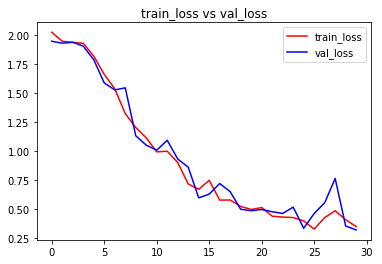

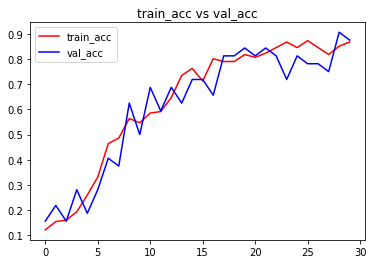

<Figure size 432x288 with 0 Axes>

In [10]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

Test Loss: 0.3199419379234314
Test accuracy: 0.875
(1, 128, 128, 3)
[[8.56436884e-07 1.98504580e-07 9.57269913e-06 3.69597365e-05
  9.97797966e-01 2.14194320e-03 1.24948365e-05]]
[4]
[[0. 0. 0. 0. 1. 0. 0.]]


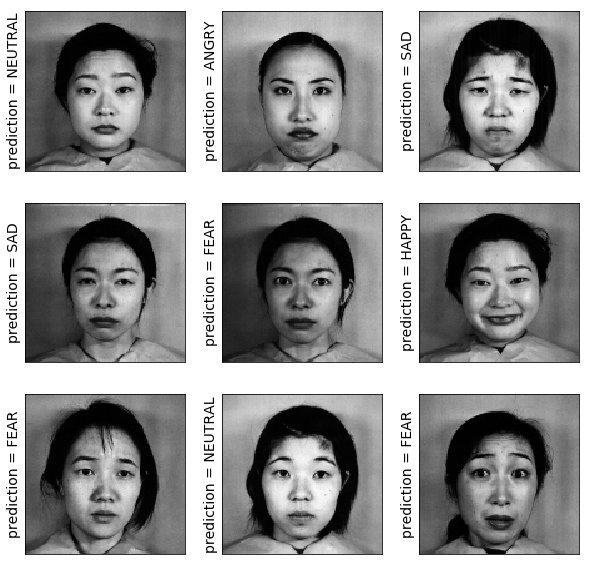

In [11]:
# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

res = model.predict_classes(X_test[:9])
plt.figure(figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)
# show the plot
plt.show()


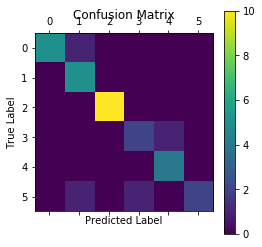

In [12]:
from sklearn.metrics import confusion_matrix
results = model.predict_classes(X_test )
cm = confusion_matrix(np.where(y_test == 1)[1], results)
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

test image original shaape (128, 128, 3)
image original shaape (128, 128, 3)


Text(0.5, 0, 'prediction = ANGRY')

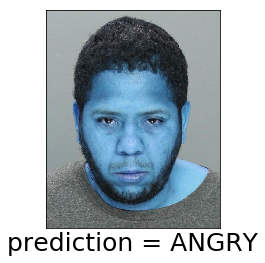

In [13]:
testimg_data_list=[]
test_img=cv2.imread('men.jpg', True)
    
test_img_resize=cv2.resize(test_img,(128,128))
testimg_data_list.append(test_img_resize)
testimg_data = np.array(testimg_data_list)
testimg_data = testimg_data.astype('float32')
testimg_data = testimg_data/255
testimg_data.shape

print("test image original shaape",testimg_data[0].shape)
print("image original shaape",img_data[0].shape)

results = model.predict_classes(testimg_data)
plt.imshow(test_img,cmap=plt.get_cmap('Set2'))
plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.xlabel('prediction = %s' % getLabel(results[0]), fontsize=25)


test image original shaape (128, 128, 3)
image original shaape (128, 128, 3)


Text(0.5, 0, 'prediction = SURPRISE')

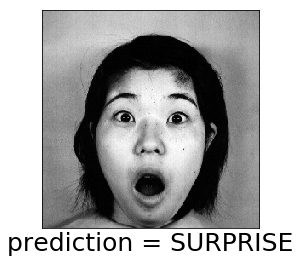

In [14]:
testimg_data_list=[]
test_img=cv2.imread('surprise7.jpg.', True)
    
test_img_resize=cv2.resize(test_img,(128,128))
testimg_data_list.append(test_img_resize)
testimg_data = np.array(testimg_data_list)
testimg_data = testimg_data.astype('float32')
testimg_data = testimg_data/255
testimg_data.shape

print("test image original shaape",testimg_data[0].shape)
print("image original shaape",img_data[0].shape)

results = model.predict_classes(testimg_data)
plt.imshow(test_img,cmap=plt.get_cmap('Set2'))
plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.xlabel('prediction = %s' % getLabel(results[0]), fontsize=25)


In [18]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

lbl = LabelEncoder()

[4 0 5 5 2 3 2 4 2 2 2 1 4 2 1 1 1 4 0 1 0 2 4 2 0 0 3 2 1 1 2 3] (32,) <class 'numpy.ndarray'> <class 'numpy.ndarray'>
[[ 5  1  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0  2  1  0]
 [ 0  0  0  0  4  0]
 [ 0  1  0  1  0  2]]
[[1.         0.14285714 0.         0.         0.         0.        ]
 [0.         0.71428571 0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.66666667 0.2        0.        ]
 [0.         0.         0.         0.         0.8        0.        ]
 [0.         0.14285714 0.         0.33333333 0.         1.        ]]
[[0.83333333 0.16666667 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.66666667 0.33333333 0.        ]
 [0.         0.         0.         0.         1.         0.   

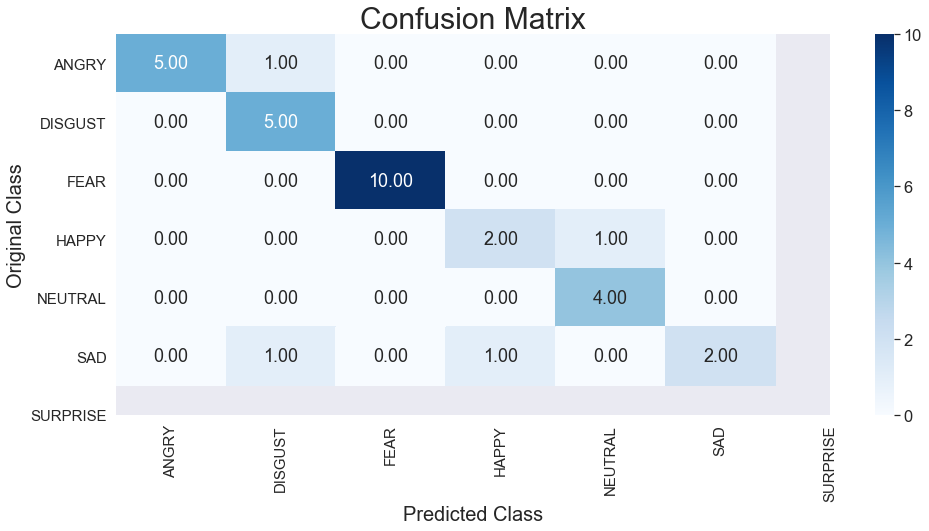

-----------------------------------------------------------------------------------------------------------------------------


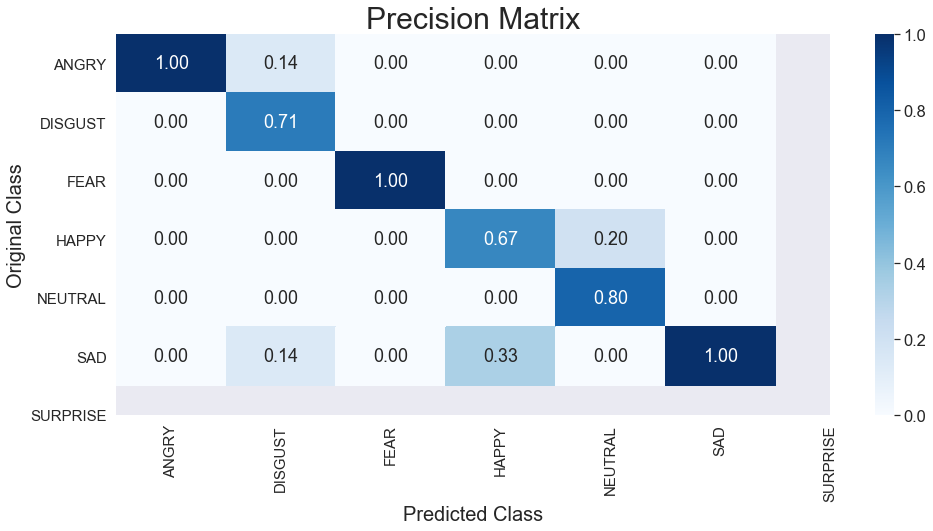

-----------------------------------------------------------------------------------------------------------------------------


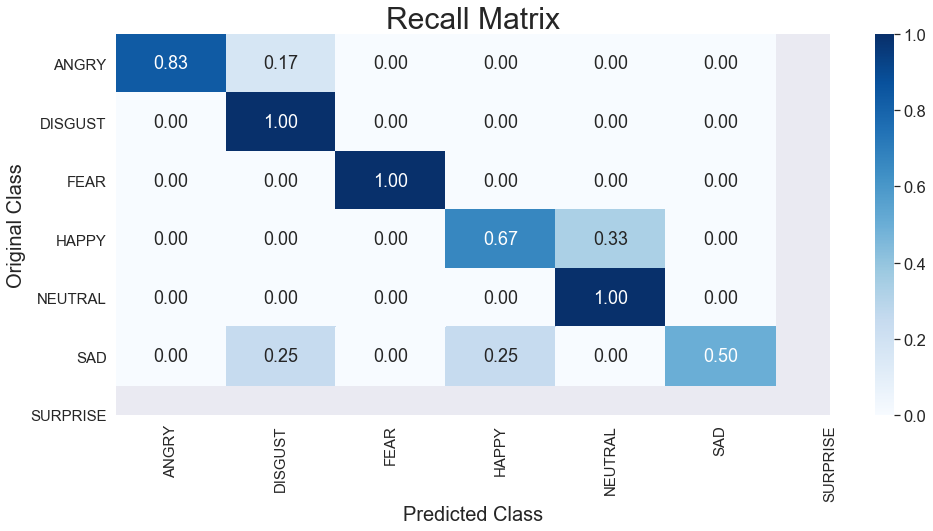

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
results = model.predict_classes(X_test) 
print(results,results.shape,type(results),type(y_test))

confusionMatx = confusion_matrix(lbl.fit_transform(np.argmax(y_test, axis=1)), results)

#accuracy = confusionMatx[0,0] +confusionMatx[0,1]/

precision = confusionMatx/confusionMatx.sum(axis = 0)
recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T

print(confusionMatx)
print(precision)
print(recall)
    
sns.set(font_scale=1.5)

    
labels = ["ANGRY", "DISGUST", "FEAR", "HAPPY", "NEUTRAL", "SAD", "SURPRISE"]
    
plt.figure(figsize=(16,7))
sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix", fontsize = 30)
plt.xlabel('Predicted Class', fontsize = 20)
plt.ylabel('Original Class', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 90)
plt.show()
print("-"*125)
    
plt.figure(figsize=(16,7))
sns.heatmap(precision, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
plt.title("Precision Matrix", fontsize = 30)
plt.xlabel('Predicted Class', fontsize = 20)
plt.ylabel('Original Class', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 90)
plt.show()
    
print("-"*125)
    
plt.figure(figsize=(16,7))
sns.heatmap(recall, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
plt.title("Recall Matrix", fontsize = 30)
plt.xlabel('Predicted Class', fontsize = 20)
plt.ylabel('Original Class', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 90)
plt.show()
    

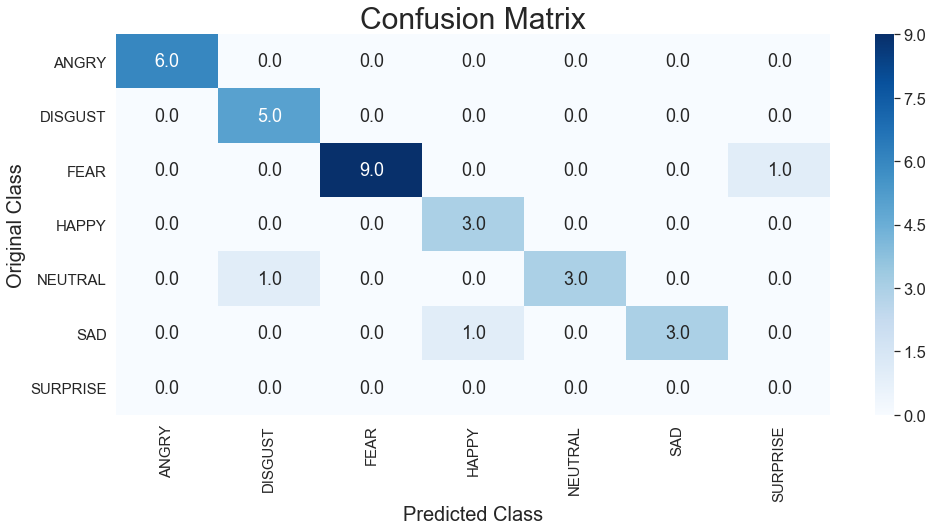

-----------------------------------------------------------------------------------------------------------------------------


In [18]:
from sklearn.metrics import confusion_matrix
results = model.predict_classes(X_test )
cm = confusion_matrix(np.where(y_test == 1)[1], results)
sns.set(font_scale=1.5)
plt.figure(figsize=(16,7))
labels11 = ["ANGRY", "DISGUST", "FEAR", "HAPPY", "NEUTRAL", "SAD", "SURPRISE"]
sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".1f", xticklabels=labels11, yticklabels=labels11)
plt.title("Confusion Matrix", fontsize = 30)
plt.xlabel('Predicted Class', fontsize = 20)
plt.ylabel('Original Class', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 90)
plt.show()
print("-"*125)
